In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import jax.numpy as np
from jaxsnn.event.leaky_integrate_and_fire import LIFParameters

Let's explore different loss functions and plot them.

In [18]:
def ttfs_loss(t1, t2, p: LIFParameters):
    alpha = 1
    return np.log(1 + np.exp((t1 - t2) / (alpha * p.tau_syn)))


def event_prop_loss(t1, t2, p: LIFParameters):
    zaehler = np.exp(-t1 / p.tau_mem)
    nenner = np.exp(-np.abs(t1) / p.tau_mem) + np.exp(-np.abs(t2) / p.tau_mem)
    loss_value = -np.log(zaehler / nenner)
    return loss_value


def adapted_event_prop_loss(t1, t2, p: LIFParameters):
    zaehler = 1 + np.exp(-t1 / p.tau_mem)
    nenner = 1 + np.exp(-np.abs(t1) / p.tau_mem) + 1 + np.exp(-np.abs(t2) / p.tau_mem)
    loss_value = -np.log(zaehler / nenner)
    return loss_value


def adapted_ttfs_loss(t1, t2, p: LIFParameters):
    return -np.log(2 + np.exp(-t1 / p.tau_syn) - np.exp(-t2 / p.tau_syn))


def mse_loss(t1, t2, p: LIFParameters):
    return np.square(t1 - 0.9 * p.tau_syn) + np.square(t2 - 1.5 * p.tau_syn)

def regularization(t1, t2, p: LIFParameters):
    # α exp tn∗ /βτs − 1 
    pass

In [19]:
def plot_loss_function(ax, loss_fn, title):
    # units of tau syn
    n = 100
    t1 = np.linspace(0, 2, n)
    t2 = np.linspace(0, 2, n)
    xx, yy = np.meshgrid(t1, t2)

    p = LIFParameters()
    zz = loss_fn(xx * p.tau_syn, yy * p.tau_syn, p)
    ax.set_xlabel(r"Spike time correct label neuron $[\tau_s]$")
    ax.set_ylabel(r"Spike time wrong label neuron $[\tau_s]$")
    ax.contour(t1, t2, zz, levels=20, alpha=1, colors="k", linestyles="solid")
    ax.contourf(t1, t2, zz, levels=500, cmap=mpl.colormaps["viridis"], alpha=1.0)
    if title is not None:
        ax.set_title(title)

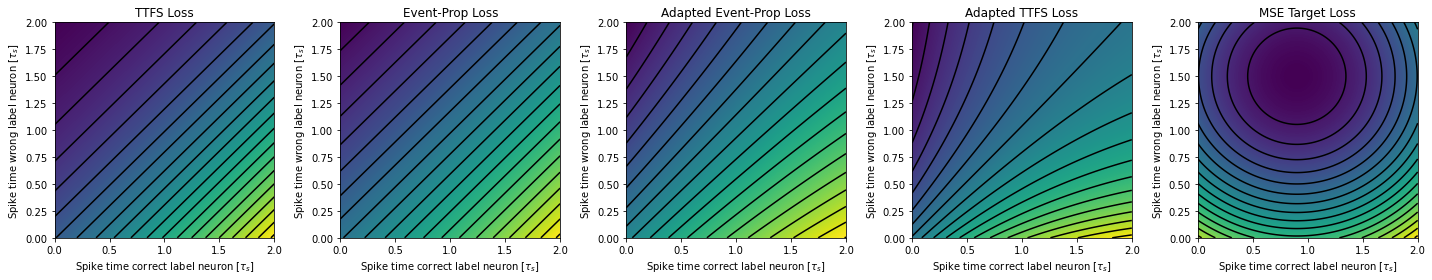

In [20]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
plot_loss_function(axs[0], ttfs_loss, title="TTFS Loss")
plot_loss_function(axs[1], event_prop_loss, title="Event-Prop Loss")
plot_loss_function(axs[2], adapted_event_prop_loss, title="Adapted Event-Prop Loss")
plot_loss_function(axs[3], adapted_ttfs_loss, title="Adapted TTFS Loss")
plot_loss_function(axs[4], mse_loss, "MSE Target Loss")
plt.tight_layout()
plt.show()